## Business Problem

### In India, 15 lakh software engineers graduate every year out of which only 4.77% meet the minimum hiring criteria of product firms. This top talent is in very high demand in the tech industry. Data science can help the companies identify the best ways to attract this talent.

## Imoprt Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Recruitment_Data.csv")
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB


In [4]:
df.describe()

,attrition,performance_rating,sales_quota_pct
count,446.000000,446.000000,446.000000
mean,0.213004,2.894619,1.082607
std,0.409891,0.683755,0.710042
min,0.000000,1.000000,-0.710827
25%,0.000000,2.000000,0.584444
50%,0.000000,3.000000,1.070143
75%,0.000000,3.000000,1.532488
max,1.000000,5.000000,3.666740


In [5]:
# chenking null values
round(100*df.isnull().sum()/len(df),2)

attrition              0.00
performance_rating     0.00
sales_quota_pct        0.00
recruiting_source     45.96
dtype: float64

In [6]:
df["recruiting_source"] = df["recruiting_source"].fillna("NaN")

In [7]:
# Rechenking null values
round(100*df.isnull().sum()/len(df),2)

attrition             0.0
performance_rating    0.0
sales_quota_pct       0.0
recruiting_source     0.0
dtype: float64

In [8]:
# Now Do Groupby 
# The average Sales Number grouped by Recruiting Source
avg_sales_num = df.groupby("recruiting_source")["sales_quota_pct"].mean()
avg_sales_num

recruiting_source
Applied Online    1.058590
Campus            0.908035
NaN               1.168109
Referral          1.023198
Search Firm       0.886960
Name: sales_quota_pct, dtype: float64

In [9]:
# The average Attrition Number grouped by Recruiting Source
avg_attri_num = df.groupby("recruiting_source")["attrition"].mean()
avg_attri_num

recruiting_source
Applied Online    0.246154
Campus            0.285714
NaN               0.131707
Referral          0.333333
Search Firm       0.500000
Name: attrition, dtype: float64

## Data Visualizations

In [10]:
avg_attri_num = df.groupby("recruiting_source")["attrition"].mean().reset_index()

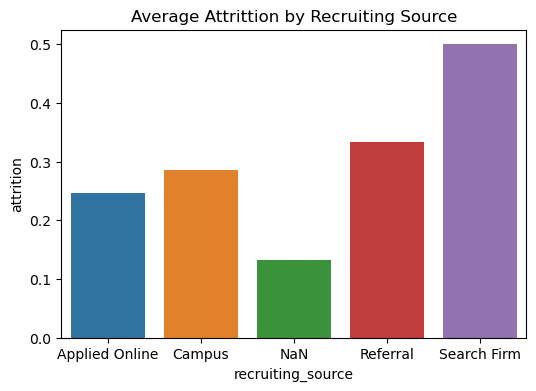

In [11]:
# task-1
# Visualiz Plot
# recruiting_source ----> attrition

plt.figure(figsize = (6,4))
sns.barplot(x = "recruiting_source", y ="attrition", data =avg_attri_num)
plt.title("Average Attrittion by Recruiting Source")
plt.show()

In [12]:
# Applied Online: Has the Lowe attrition rate(0.246154).

# Campus: Has Slightly higher attrition rate(0.285714).compared to Applied Online.

# Nan: Not Available Data has lowest attrition rate( 0.131707).

# Referral: Has Average attrition rate(0.333333).

# Search Firm: Has highest attrition rate( 0.500000)

In [13]:
# task-2
# Visualize plot
# recruiting_source -----> sales_quota_pct 

In [14]:
avg_sales_num = df.groupby("recruiting_source")["sales_quota_pct"].mean().reset_index()

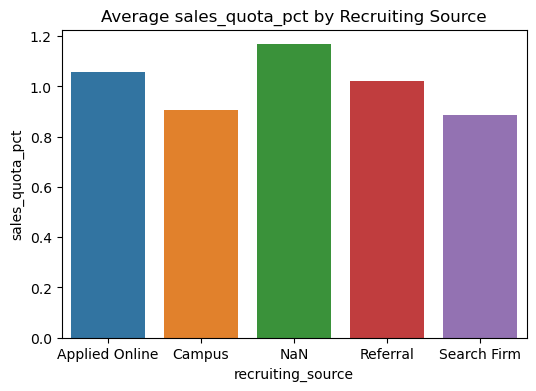

In [15]:
plt.figure(figsize=(6,4))
sns.barplot(x = "recruiting_source", y= "sales_quota_pct", data = avg_sales_num)
plt.title("Average sales_quota_pct by Recruiting Source")
plt.show()

In [16]:
# Applied Online: Has slightly lowest average sale quota (1.058590), Compared to Not Available Data.indicating strong performance.

# Campus: Show a moderate average sales quota (0.908035).

# Nan: Not Available data has slightly highest average sale quota (1.168109), Compared to Applied online.

# Referral: Also shows a good sales performance (1.023198) but slightly lower than Applied Online.

# Search Firm: Has the lowest sales quota percentage ( 0.886960). 

## Conclusions:

#### 1. Best Recruiting Source is Applied Online.
#### 2. It has highest average sale performance and lowest  attrition rates.
#### 3. This indicates that employees recruited through this source not only                  perform well but also stay longer with the company.
